Pruebas - Preprocesamiento de Imágenes

#####Alumna Farinazzo Analia 24994389@ifts24.edu.ar


In [ ]:
#Importo las librerías más comunes para el manejo de imágenes.  Puede que no todas tengan uso posterior.

import numpy as np
import cv2
from cv2 import imread
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

from PIL import Image

In [ ]:
# Para poder probar las sentencias de proceso, igualmente tengo que cargar una imagen.
# Utilizaremos la opción de tomarla desde un drive propio.


# Tomar y mostrar una imagen disponible en un drive.

# Conecto el Drive donde tengo alojada la imagen
from google.colab import drive
import os

# Monto el drive (conecto el drive con el colab)
drive.mount("/content/drive/", force_remount=True)
#fuerzo el remount por si ejecuto varias veces y ya estaba montado.

# Cambio el directorio para posicionarme donde están las imágenes.
os.chdir('/content/drive/MyDrive/EntregaTPProcesamientoImg/ImagenesPrueba/')

Mounted at /content/drive/


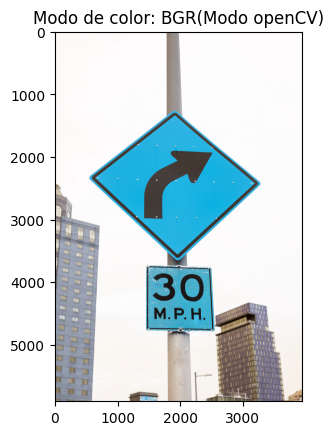

In [ ]:
#Tomo y "leo" la imagen elegida desde el drive.
city1 = imread('Señal_Ciudad.jpg')  ### Ojo!  Es sensible de Mayúsculas y Minúsculas (colab corre en un entorno unix)

#La mostramos con los colores invertidos porque plt utiliza RGB y cv2 BGR
plt.title("Modo de color: BGR(Modo openCV)")
plt.imshow(city1)
plt.show()


In [ ]:
#Uso un método de OpenCV para poder verla correctamente.

#  Opción de parche de opencv.  Muestra las imágenes también con los canales en el orden BGR
print("Colores originales desde cv2 imshow")
cv2_imshow(city1)

In [ ]:
#Comienzo analizando las características y estadísitcas de la imagen.  Además vamos a explorar un poco sus espacios de color.

#Verificamos su tipo.

type(city1)




numpy.ndarray

In [15]:
# Obtengo las dimensiones de la imagen en variables separadas por si las necesito luego.  A posterior las muestro a todas como partes de una misma información "Tamaño".

Alto1, Ancho1, Canales1 = city1.shape
print("Alto = ", Alto1)
print("Ancho = ", Ancho1)
print("Canales = ", Canales1)


Alto =  5899
Ancho =  3938
Canales =  3


In [ ]:
#Obtenemos sus características básicas - Alto, Ancho, Canales de Color, intensidad máxima y mínima y promedio.

print('Tamaño = ',city1.shape)  #Alto, Ancho, Canales de Color.
print('Max  = ',np.max(city1))
print('Min  = ',np.min(city1))
print('Promedio = ', np.mean(city1))

Tamaño =  (5899, 3938, 3)
Max  =  255
Min  =  0
Promedio =  207.61517205445207


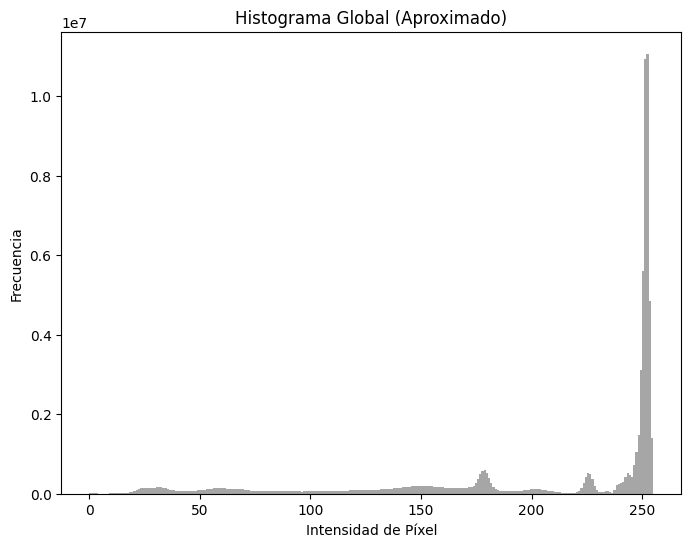

In [ ]:
#Podemos verificar los valores recién obtenidos, generando un histograma de la imagen.

# Histograma global de la imagen - Nos permite obtener una idea general
# del brillo, el contraste y la distribución tonal de la imagen.

plt.figure(figsize=(8, 6))
plt.hist(city1.flatten(), bins=256, color='gray', alpha=0.7)
plt.title('Histograma Global (Aproximado)')
plt.xlabel('Intensidad de Píxel')
plt.ylabel('Frecuencia')
plt.show()

# En este caso estoy usando la imagen a color, donde "aplané" los canales en una única distribución.  De esta forma, vemos más la
# información sobre la distribución general del brillo y el contraste de la imagen.
#  Conclusiones:  Predominancia de tonos claros
#                 Buena iluminación general
#                 Contraste podría ser limitado en algunas áreas

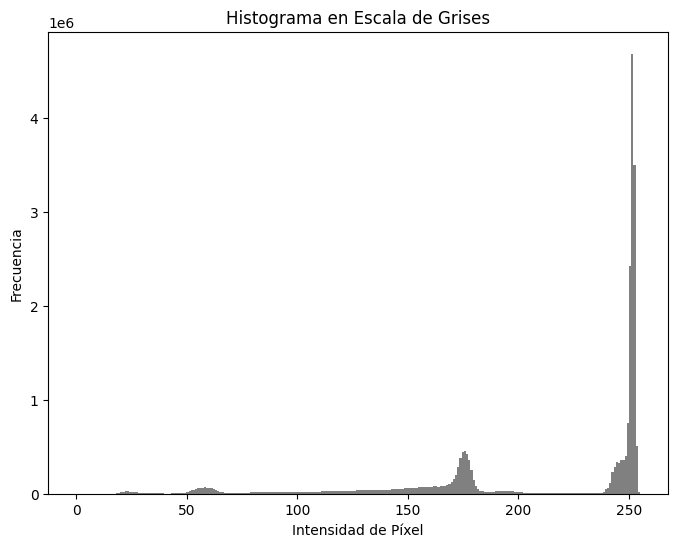

In [12]:
# Histograma de la imagen convertida a escala de grises- Analizando este histograma podremos
# obtener información sobre el contraste entre el objeto principal y el fondo.
# Saber esto, nos ayudará en el futuro a identificar, por ejemplo, el mejor método para la segmentación, que tal vez se podría
#hacer por intesidad.

city2 = cv2.cvtColor(city1, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(8, 6))
plt.hist(city2.flatten(), bins=256, color='gray')
plt.title('Histograma en Escala de Grises')
plt.xlabel('Intensidad de Píxel')
plt.ylabel('Frecuencia')
plt.show()


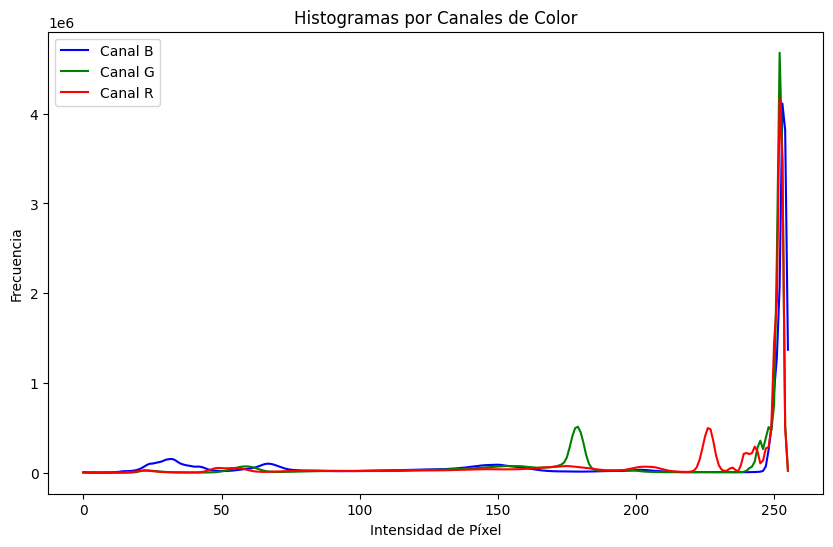

In [14]:
# Ahora analizaremos los histogramas de cada color.  Siendo que se ve a simple vista que el objeto principal (la seña) es amarilla, deberíamos
# identificar picos en los canales Rojo y Verde que son los necesarios para conformar el amarillo.
# ¿Será así?

colores = ('b','g','r')
plt.figure(figsize=(10, 6))
for i, col in enumerate(colores):
    histograma = cv2.calcHist([city1], [i], None, [256], [0, 256])
    plt.plot(histograma, color=col, label=f'Canal {col.upper()}')
plt.title('Histogramas por Canales de Color')
plt.xlabel('Intensidad de Píxel')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Para poder comparar los histogramas de los diferentes canales, generé una tupla con los canales en el orden en que los utiliza OpenCV (BGR)
# Luego iteré sobre la tupla, tomando también el indice que le va a decir al histograma que canal analizar en cada caso.
# Luego superpuse cada uno de los histogramas, dibujándolos con el color del canal que representan.

# Dado que hay mucha presencia del color amarillo, y este se conforma con Rojo y Verde, se espera picos de estos en las frecuencas Medias y Altas.
# Y el azul presente en la tonalidad de ciertos edificios y un poco en el cielo, con una presencia ligeramente
# mayor que los otros colores en las frecuencias bajas y medias.


### Obtenemos las estasdísticas de cada canal por separado.  Haciendo para cada uno un análisis individual.

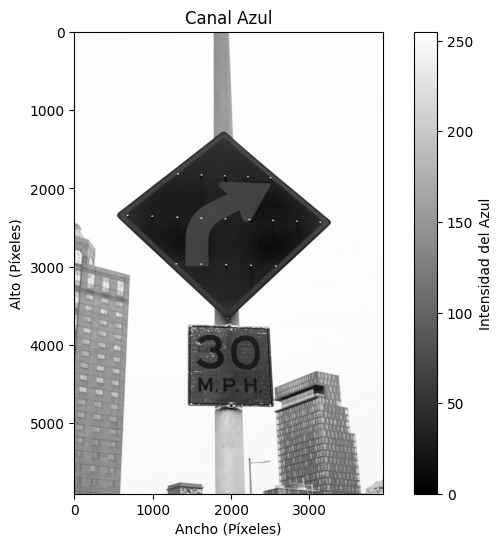

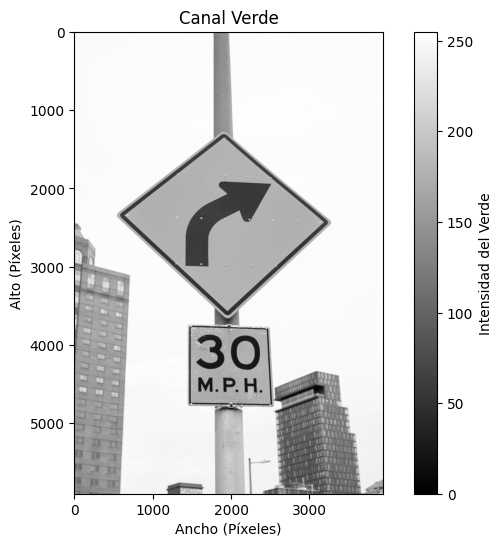

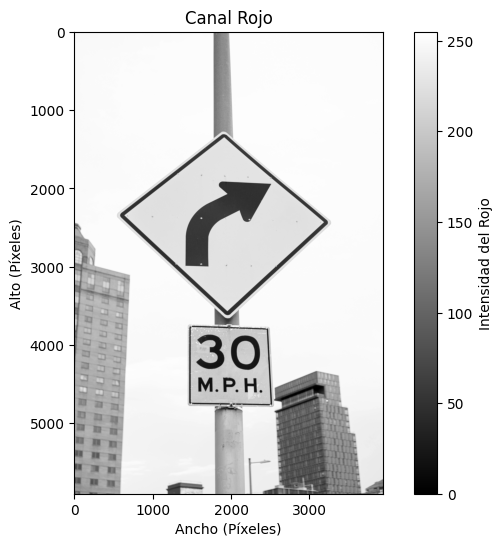

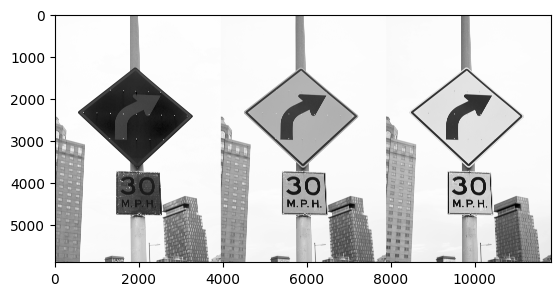

In [16]:
# Extraer cada canal según el índice 0=Azul, 1=Verde, 2=Rojo
city_azul = city1[:, :, 0]
city_verde = city1[:, :, 1]
city_rojo = city1[:, :, 2]

# Cada 'city#color#' ahora es un array NumPy bidimensional (altura, ancho)
# que contiene solo las intensidades del canal de cada píxel.

# Podemos visualizar cada canal como una imagen en escala de grises
plt.figure(figsize=(8, 6))
plt.imshow(city_azul, cmap='gray')
plt.title('Canal Azul')
plt.xlabel('Ancho (Píxeles)')
plt.ylabel('Alto (Píxeles)')
plt.colorbar(label='Intensidad del Azul')
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(city_verde, cmap='gray')
plt.title('Canal Verde')
plt.xlabel('Ancho (Píxeles)')
plt.ylabel('Alto (Píxeles)')
plt.colorbar(label='Intensidad del Verde')
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(city_rojo, cmap='gray')
plt.title('Canal Rojo')
plt.xlabel('Ancho (Píxeles)')
plt.ylabel('Alto (Píxeles)')
plt.colorbar(label='Intensidad del Rojo')
plt.show()

#O alinearlas a todas para una comparación más sencilla.

comp_canal = np.hstack((city_azul,city_verde,city_rojo))
plt.imshow(comp_canal, cmap='gray')
plt.show()



En la comparación, podemos concluir que el amarillo, tiene más color Rojo y Verde, que color Azul, dado que se aproximan más a un color claro en los canales donde se encuentran con más intensidad.

Estadísticas del Canal Azul:
  Mínimo: 0
  Máximo: 255
  Media: 194.24
  Desviación Estándar: 83.39


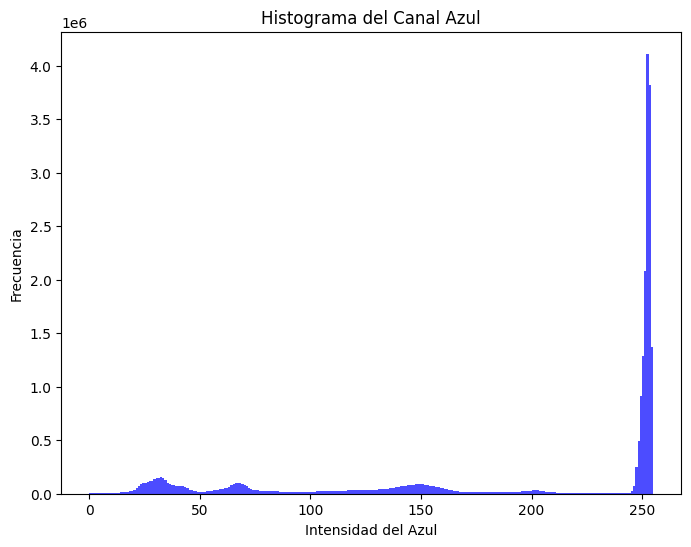

In [17]:
# Teniendo las imágenes para cada canal individual, nos permite sacar también estadísitcas diferenciadas.
# Análisis Completo Canal Azul

min_azul = np.min(city_azul)
max_azul = np.max(city_azul)
media_azul = np.mean(city_azul)
desviacion_estandar_azul = np.std(city_azul)

print(f"Estadísticas del Canal Azul:")
print(f"  Mínimo: {min_azul}")
print(f"  Máximo: {max_azul}")
print(f"  Media: {media_azul:.2f}")
print(f"  Desviación Estándar: {desviacion_estandar_azul:.2f}")

#Histograma Individual
plt.figure(figsize=(8, 6))
plt.hist(city_azul.flatten(), bins=256, color='blue', alpha=0.7)
plt.title('Histograma del Canal Azul')
plt.xlabel('Intensidad del Azul')
plt.ylabel('Frecuencia')
plt.show()


Estadísticas del Canal Verde:
  Mínimo: 0
  Máximo: 255
  Media: 211.41
  Desviación Estándar: 58.34


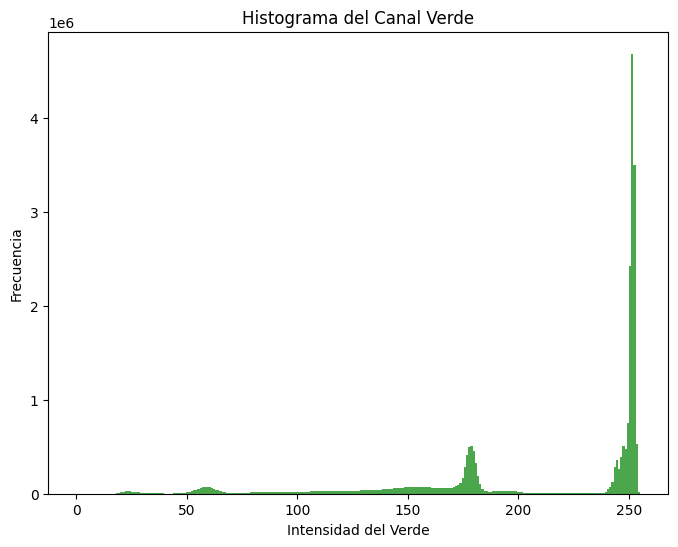

In [18]:
# Análisis Completo Canal Verde

min_verde = np.min(city_verde)
max_verde = np.max(city_verde)
media_verde = np.mean(city_verde)
desviacion_estandar_verde = np.std(city_verde)

print(f"Estadísticas del Canal Verde:")
print(f"  Mínimo: {min_verde}")
print(f"  Máximo: {max_verde}")
print(f"  Media: {media_verde:.2f}")
print(f"  Desviación Estándar: {desviacion_estandar_verde:.2f}")

#Histograma Individual
plt.figure(figsize=(8, 6))
plt.hist(city_verde.flatten(), bins=256, color='green', alpha=0.7)
plt.title('Histograma del Canal Verde')
plt.xlabel('Intensidad del Verde')
plt.ylabel('Frecuencia')
plt.show()

Estadísticas del Canal Rojo:
  Mínimo: 0
  Máximo: 255
  Media: 217.20
  Desviación Estándar: 57.17


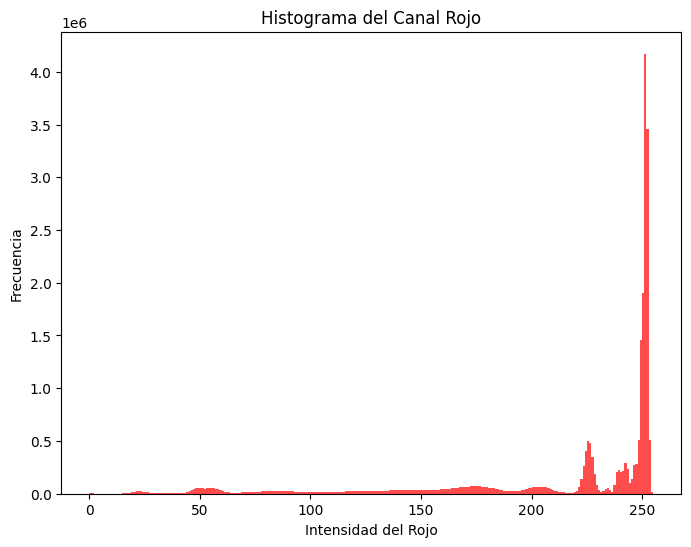

In [19]:
# Análisis Completo Canal Rojo

min_rojo = np.min(city_rojo)
max_rojo = np.max(city_rojo)
media_rojo = np.mean(city_rojo)
desviacion_estandar_rojo = np.std(city_rojo)

print(f"Estadísticas del Canal Rojo:")
print(f"  Mínimo: {min_rojo}")
print(f"  Máximo: {max_rojo}")
print(f"  Media: {media_rojo:.2f}")
print(f"  Desviación Estándar: {desviacion_estandar_rojo:.2f}")

#Histograma Individual
plt.figure(figsize=(8, 6))
plt.hist(city_rojo.flatten(), bins=256, color='red', alpha=0.7)
plt.title('Histograma del Canal Rojo')
plt.xlabel('Intensidad del Rojo')
plt.ylabel('Frecuencia')
plt.show()

A mi entender estos preprocesos nos acercan a la información de la imagen que luego nos permitirá tomar mejores decisiones al momento elegir las diferentes opciones o aplicar los diferentes procedimientos para obtener muestreos espaciales, cuantizaciones y segmentaciones.